## Aufgabe 1 (Multiple Regression)

In [1]:
import numpy as np
import pandas as pd
from sympy import *
import sympy as sym
sym.init_printing()
from IPython.display import display, Math

%matplotlib inline

In [2]:
xi_1 = np.array([0.35, 4.84, 9.51, 7.54, 2.05, 4.27, 6.49, 2.36, 8.55, 6.44 ])
xi_2 = np.array([5.81, 4.58, 7.68, 7.52, 0.88, 3.87, 3.30, 1.54, 6.45, 3.98 ])
yi   = np.array([98.9, 1134.5, 20916.8,7489.1,37.6, 663.7, 4666.0,56.6, 13605.3, 4339.3])

x1 = np.linspace(min(xi_1),max(xi_1))
x2 = np.linspace(min(xi_2),max(xi_2))

df = pd.DataFrame({"xi,1":xi_1,"xi,2":xi_2,"yi":yi, })
df

,"xi,1","xi,2",yi
0,0.35,5.81,98.9
1,4.84,4.58,1134.5
2,9.51,7.68,20916.8
3,7.54,7.52,7489.1
4,2.05,0.88,37.6
5,4.27,3.87,663.7
6,6.49,3.30,4666.0
7,2.36,1.54,56.6
8,8.55,6.45,13605.3
9,6.44,3.98,4339.3


In [3]:
def fehlergleichungssystem(x1 = None,x2 = None,n_lambda:int = None):
    A = np.ones((len(xi_1),n_lambda))
    A[:,0] = np.power(x2-np.power(x1,2),2) 
    A[:,1] = np.power(1-x1,2)
    return A

l0,l1 = symbols("λ0, λ1 ")
A_g = fehlergleichungssystem(x1 = xi_1,x2 = xi_2,n_lambda = 2)

coefficients = np.dot(np.transpose(A_g), A_g)

b = np.dot(np.transpose(A_g), yi)
np.set_printoptions(suppress=True)
x = np.linalg.solve(coefficients,b)




A = Matrix(A_g)
L = [l0,l1]
Y = Matrix(yi.reshape(len(yi),1))
Q, R = A.QRdecomposition()
Q_T = Transpose(Q)
y = Matrix(yi)
c = Q_T * y
E = list(linsolve( (R,c), L))[0]
fun = lambda x1,x2 : E[0]* np.power((x2 - np.power(x1,2)),2) + E[1]* np.power((1 - x1),2)

In [4]:
x1,x2 = sym.symbols('x1, x2')
equation = round(E[0],4) * (x2 - x1**2) + round(E[1],4) * (1 - x1)**2
display(Math('f(x1,x2) =  %s = %s' %( sym.latex(equation),sym.latex(sym.simplify(equation)) ) ))

<IPython.core.display.Math object>

Text(0.5, 0.92, 'Aufgabe 1')

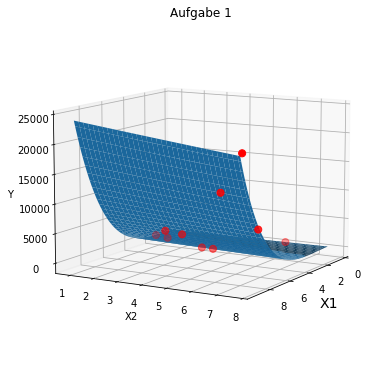

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(suppress=True)

result = [ fun(i,j) for i,j in zip(xi_1,xi_2) ]


fig = plt.figure(figsize=(6,8))
ax = plt.axes(projection='3d')

ax.scatter(xi_1,xi_2,yi, color = "red", s = 50)

x1 = np.arange(min(xi_1),max(xi_1), 0.1)
x2 = np.arange(min(xi_2), max(xi_2), 0.1)

X, Y = np.meshgrid(x1, x2)

Z = x[0]*(Y-X**2)**2 + x[1]*(1-X)**2

ax.plot_surface(X,Y,Z)
ax.view_init(10, 30)
ax.set_xlabel('X1', fontsize = 14)
ax.set_ylabel('X2', fontsize = 10)
ax.set_zlabel('Y', fontsize = 10)
plt.title("Aufgabe 1")

In [6]:
error_func = [(y[i]-result[i])**2 for i in range(len(result))]
error_func = sum(error_func)
display(Math('\ \\text{ Fehler f(x1,x2) = }{%s}  ' %( sym.latex(round(error_func,4) ) )))

<IPython.core.display.Math object>

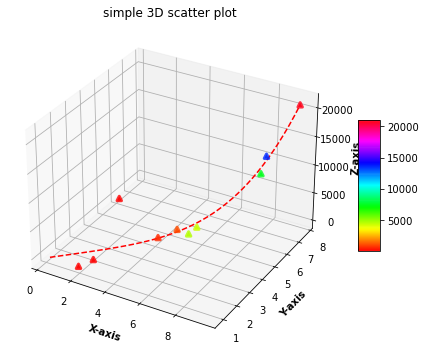

In [7]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(min(xi_1),max(xi_1))
x2 = np.linspace(min(xi_2),max(xi_2))

# Creating figure
fig = plt.figure(figsize = (9, 6))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.3,
		alpha = 0.2)

# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(xi_1, xi_2, yi,
					alpha = 0.8,
                    linewidth=3,
					cmap = my_cmap,
                    c = (xi_1 + xi_2 + yi),
					marker ='^')
ax.plot3D(x1, x2, fun(x1,x2), 'r--')
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.4, aspect =6)
plt.show()

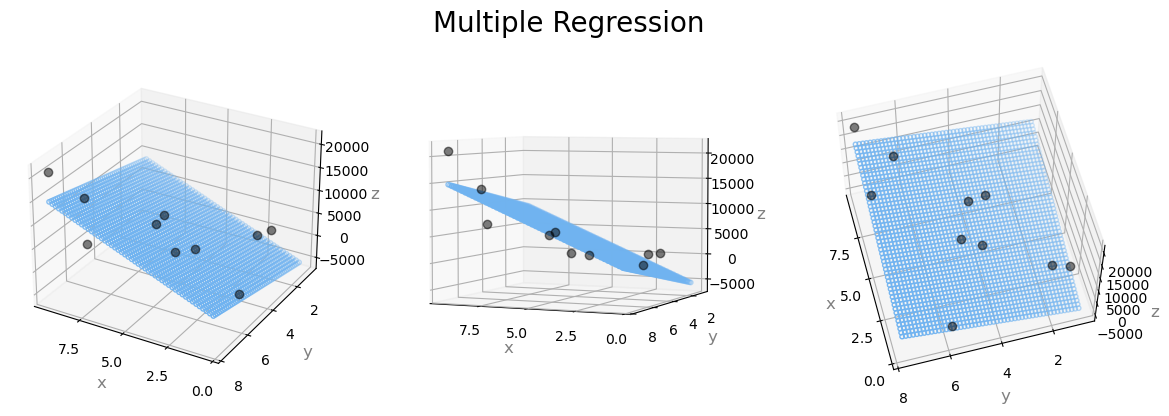

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D


X = df[['xi,1','xi,2']].values.reshape(-1,2)
Y = df['yi']

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(min(xi_1),max(xi_1))  # range of porosity values
y_pred = np.linspace(min(xi_2),max(xi_2))  # range of brittleness values

xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)


r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=10, edgecolor='#70b3f0')
    ax.set_xlabel('x', fontsize=12,color='grey')
    ax.set_ylabel('y', fontsize=12,color='grey')
    ax.set_zlabel('z', fontsize=12,color='grey')
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('Multiple Regression' , fontsize=20)

fig.tight_layout()

In [13]:
#from ipynb.fs.full.B06Data.ipynb import *
%run blatt2_data.ipynb import *
from numpy import pi,cos

In [10]:
n = len(y)
x = [-(pi) + 2*(pi*i)/n for i in range(n)]

A = np.zeros((n, 11))

for i in range(len(A)):
    for j in range(len(A[0])):
        A[i][j] = cos(j * x[i])
AT = np.transpose(A)
coefficients = np.dot(AT, A)
b = np.dot(AT, y)
solution = np.linalg.solve(coefficients, b)

y_new = np.dot(A, solution)
error_func = np.subtract(y, y_new)
error_func = np.sum(np.dot(error_func, error_func))
print(error_func)

B = np.zeros((n, 4))
x_values = [0,3,5,9]
for i in range(len(B)):
    for j in range(len(B[0])):
        B[i][j] = np.cos(x_values[j]*x[i])
BT = np.transpose(B)
coefficient_B = np.dot(BT, B)
b_2 = np.dot(BT, y)
solution_b = np.linalg.solve(coefficient_B, b_2)

yb_new = np.dot(B, solution_b)
error_func_b = np.subtract(y, yb_new)
rausch = np.subtract( yb_new,y)
error_func_b = np.dot(error_func_b, error_func_b)
error_func_b = np.sum(error_func_b)
print(error_func_b)


k = Matrix(AT)*Matrix(A)

display(Math(sym.latex(k)))

117.5220895091571
123.64279012772872


<IPython.core.display.Math object>

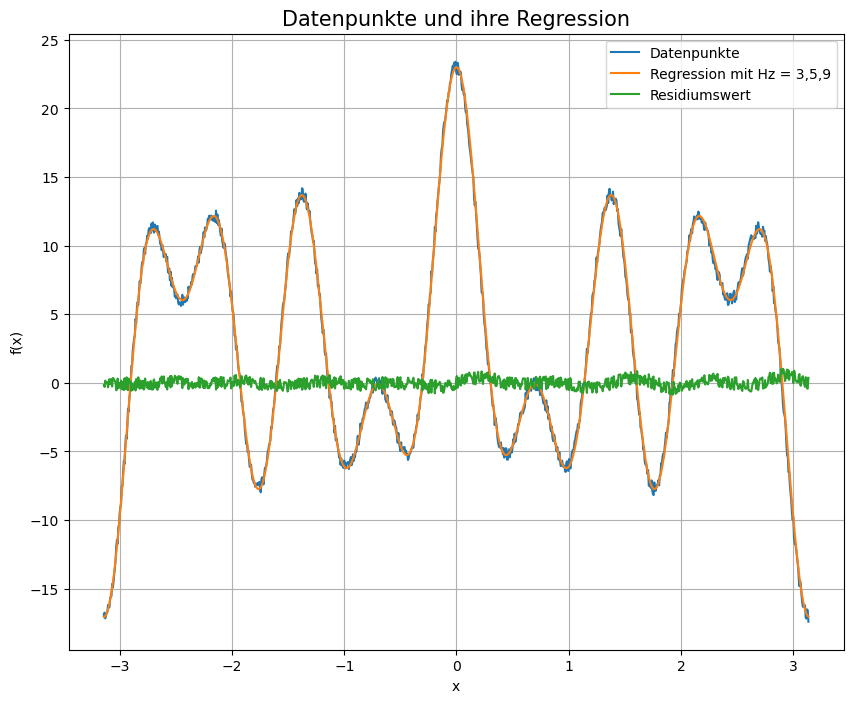

In [12]:
plt.figure(figsize=(10,8))
plt.plot(x,y, label = "Datenpunkte")
#plt.plot(x,y_new, label = "Regression mit allen Frequenzen")
plt.plot(x, yb_new, label = "Regression mit Hz = 3,5,9")
plt.grid()
plt.plot(x,rausch, label = "Residiumswert")
plt.xlabel("x", fontsize = 10)
plt.ylabel("f(x)", fontsize = 10)
plt.title("Datenpunkte und ihre Regression", fontsize= 15)
plt.legend()
plt.show()